# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, mean_squared_error, r2_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [12]:
data = pd.read_csv('data_with_clusters.csv')
data.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon,DBSCAN_Cluster_Feature_Engineered,Album_encoded
0,686,4982,2637,0,1.195758,0.325870,0.215386,0.715524,-0.989238,-0.278033,...,2.206628,3.142135,0.748338,2,2,3.744920,-0.975635,0,-1,3675
1,686,12384,7751,0,0.337753,0.316536,0.401618,-0.593096,-0.714728,-0.286519,...,-0.073463,0.243086,0.021741,2,2,0.732154,2.432606,0,-1,9357
2,686,10329,6933,2,0.452557,1.343283,0.807923,-0.396981,-0.869913,-0.047836,...,-0.306690,-0.206274,-0.101730,2,2,-0.287107,0.677499,0,-1,8448
3,686,10894,7751,0,0.416303,0.484549,0.402696,-0.630536,-1.018405,2.338837,...,0.439176,0.643090,0.148465,2,2,1.246198,1.549377,0,-1,9357
4,686,2897,4139,0,0.259203,0.274533,-0.204499,0.662038,-0.930030,-0.290067,...,1.931223,3.128841,0.675226,2,2,1.999630,1.159779,1,-1,5344


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [13]:
# Menentukan fitur dan target
# Misalnya kita ingin memprediksi 'Stream' sebagai target, dan sisanya sebagai fitur
X = data.drop(columns=['Stream', 'DBSCAN_Cluster_Feature_Engineered'])
y = data['DBSCAN_Cluster_Feature_Engineered']

# Melakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran dataset
print(f"Ukuran data latih (X_train): {X_train.shape}")
print(f"Ukuran data uji (X_test): {X_test.shape}")


Ukuran data latih (X_train): (16475, 24)
Ukuran data uji (X_test): (4119, 24)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [14]:
# Membuat model Random Forest Classifier
model_rfc = RandomForestClassifier(random_state=42)

# Melatih model dengan data latih
model_rfc.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_rfc = model_rfc.predict(X_test)

# Menghitung Mean Squared Error (MSE) sebagai evaluasi
mse_rf = mean_squared_error(y_test, y_pred_rfc)
print(f"Mean Squared Error Random Forest Classifier: {mse_rf:.2f}")


Mean Squared Error Random Forest Classifier: 0.00


:pada pelatihan kali ini saya menggunakan algoritma RandomforestClassifier

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters (Randomized Search): {'max_depth': 19, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 179}
Testing Accuracy: 1.00
Testing F1-Score: 1.00
Testing Precision: 1.00
Testing Recall: 1.00


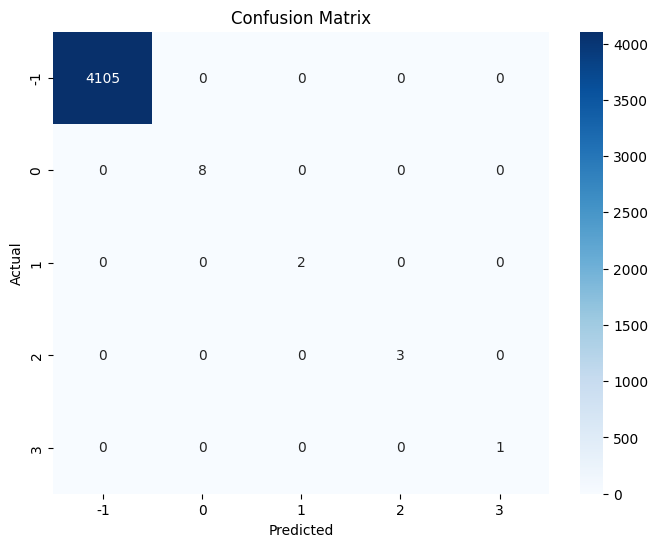


Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      4105
           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1

    accuracy                           1.00      4119
   macro avg       1.00      1.00      1.00      4119
weighted avg       1.00      1.00      1.00      4119



In [15]:
# Inisialisasi model Random Forest untuk klasifikasi
rfc = RandomForestClassifier(random_state=42)

# Parameter untuk tuning
param_dist = {
    'n_estimators': randint(50, 300),          # Jumlah pohon (50-300)
    'max_depth': randint(3, 20),              # Kedalaman pohon (3-20)
    'min_samples_split': randint(2, 20),      # Minimum sampel untuk split
    'min_samples_leaf': randint(1, 10),       # Minimum sampel per daun
    'max_features': ['sqrt', 'log2', None]    # Fitur yang dipakai tiap split
}

# Randomized Search untuk hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=50,  # Jumlah iterasi pencarian
    cv=3,       # Cross-validation (3 fold)
    scoring='accuracy',  # Gunakan Accuracy sebagai metrik utama
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit model pada training set
random_search.fit(X_train, y_train)

# Model terbaik dari Randomized Search
best_rfc = random_search.best_estimator_

# Prediksi pada training dan testing set
y_train_pred = best_rfc.predict(X_train)
y_test_pred = best_rfc.predict(X_test)

# Evaluasi pada testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # Menggunakan rata-rata weighted untuk multi-class
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

# Output hasil evaluasi
print("Best Hyperparameters (Randomized Search):", random_search.best_params_)
print(f"Testing Accuracy: {test_accuracy:.2f}")
print(f"Testing F1-Score: {test_f1:.2f}")
print(f"Testing Precision: {test_precision:.2f}")
print(f"Testing Recall: {test_recall:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_rfc.classes_, yticklabels=best_rfc.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Menampilkan laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

### GridSearch

In [16]:
# Definisi model
rf_model = RandomForestClassifier(random_state=42)

# Grid Search dengan kombinasi parameter lebih sedikit agar tidak membebani komputasi
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Latih model dengan Grid Search
grid_search.fit(X_train, y_train)
print(f"Best Hyperparameters (Grid Search): {grid_search.best_params_}")
best_model_grid = grid_search.best_estimator_

# Evaluasi model Grid Search
y_pred_grid = best_model_grid.predict(X_test)
rmse_grid = np.sqrt(mean_squared_error(y_test, y_pred_grid))  # Menghitung RMSE manual
print(f"RMSE (Grid Search): {rmse_grid:.2f}")

# Randomized Search dengan iterasi lebih sedikit
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 3)
}
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='neg_mean_squared_error',
    random_state=42
)

# Latih model dengan Randomized Search
random_search.fit(X_train, y_train)
print(f"Best Hyperparameters (Randomized Search): {random_search.best_params_}")
best_model_random = random_search.best_estimator_

# Evaluasi model Randomized Search
y_pred_random = best_model_random.predict(X_test)
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred_random))  # Menghitung RMSE manual
print(f"RMSE (Randomized Search): {rmse_random:.2f}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters (Grid Search): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
RMSE (Grid Search): 0.03
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters (Randomized Search): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 149}
RMSE (Randomized Search): 0.00


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [18]:
# 1. Akurasi Sebelum Tuning (Model tanpa tuning)
model_initial = RandomForestClassifier(random_state=42)
model_initial.fit(X_train, y_train)
y_pred_initial = model_initial.predict(X_test)

# Menghitung metrik evaluasi untuk model awal
mse_initial = mean_squared_error(y_test, y_pred_initial)
r2_initial = r2_score(y_test, y_pred_initial)
print(f"MSE Sebelum Tuning: {mse_initial:.2f}")
print(f"R-squared Sebelum Tuning: {r2_initial:.2f}")

# 2. Akurasi Setelah Tuning (Grid Search)
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred_grid = grid_search.predict(X_test)

# Menghitung metrik evaluasi untuk model Grid Search
mse_grid = mean_squared_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)
print(f"MSE Setelah Tuning (Grid Search): {mse_grid:.2f}")
print(f"R-squared Setelah Tuning (Grid Search): {r2_grid:.2f}")

# 3. Akurasi Setelah Tuning (Randomized Search)
param_dist = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)
y_pred_random = random_search.predict(X_test)

# Menghitung metrik evaluasi untuk model Randomized Search 
mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)
print(f"MSE Setelah Tuning (Randomized Search): {mse_random:.2f}")
print(f"R-squared Setelah Tuning (Randomized Search): {r2_random:.2f}")


MSE Sebelum Tuning: 0.00
R-squared Sebelum Tuning: 1.00
MSE Setelah Tuning (Grid Search): 0.00
R-squared Setelah Tuning (Grid Search): 0.95


C:\Users\rizqy\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


MSE Setelah Tuning (Randomized Search): 0.00
R-squared Setelah Tuning (Randomized Search): 0.95


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning:
  - setelah proses hyperparameter tuning hasil evaluasi akhir tidak memiliki perbedaan yang signifikan.
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
     - preicision dan recall berada di tingkatan yang sama
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### Rekomendai Hasil Evaluasi Model KLasifikasi
   #### 1.Coba Model Lain
   ##### model kedua yang saya pakai adalah Gradient Boosting Machines (GBM)
   ####

In [20]:
# Inisialisasi model Gradient Boosting 
gbm = GradientBoostingClassifier(random_state=42)

# Parameter untuk tuning
param_dist = {
    'n_estimators': randint(50, 300),         # Jumlah pohon (50-300)
    'learning_rate': uniform(0.01, 0.3),      # Learning rate (0.01 - 0.3)
    'max_depth': randint(3, 10),              # Kedalaman pohon (3-10)
    'min_samples_split': randint(2, 20),      # Minimum sampel untuk split
    'min_samples_leaf': randint(1, 10),       # Minimum sampel per daun
    'subsample': uniform(0.7, 0.3),           # Subsampling untuk data (70%-100%)
    'max_features': ['sqrt', 'log2', None]    # Fitur yang dipakai tiap split
}

# Randomized Search untuk hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=gbm,
    param_distributions=param_dist,
    n_iter=50,  # Jumlah iterasi pencarian
    cv=3,       # Cross-validation (3 fold)
    scoring='f1',  # Gunakan F1-Score sebagai metrik utama
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit model pada training set
random_search.fit(X_train, y_train)

# Model terbaik dari Randomized Search
best_gbm = random_search.best_estimator_

# Prediksi pada training dan testing set
y_train_pred = best_gbm.predict(X_train)
y_test_pred = best_gbm.predict(X_test)

# Evaluasi pada training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Evaluasi pada testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Output hasil
print("Best Hyperparameters (Randomized Search):", random_search.best_params_)
print(f"Training Accuracy: {train_accuracy:.2%}")
print(f"Training F1-Score: {train_f1:.2%}")
print(f"Testing Accuracy: {test_accuracy:.2%}")
print(f"Testing F1-Score: {test_f1:.2%}")
print("\nClassification Report (Testing Set):")
print(classification_report(y_test, y_test_pred))
print("\nConfusion Matrix (Testing Set):")
print(confusion_matrix(y_test, y_test_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\rizqy\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Hyperparameters (Randomized Search): {'learning_rate': np.float64(0.12236203565420874), 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 171, 'subsample': np.float64(0.7467983561008608)}
Training Accuracy: 99.79%
Training F1-Score: 99.82%
Testing Accuracy: 99.66%
Testing F1-Score: 99.67%

Classification Report (Testing Set):
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      4105
           0       0.73      1.00      0.84         8
           1       0.25      1.00      0.40         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1

    accuracy                           1.00      4119
   macro avg       0.40      0.60      0.45      4119
weighted avg       1.00      1.00      1.00      4119


Confusion Matrix (Testing Set):
[[4095    3    6    0    1]
 [   0    8    0    0    0]
 [   0    0    2    0    0]
 [   3    

C:\Users\rizqy\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rizqy\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rizqy\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i